In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Input, concatenate
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import tensorflow.keras.utils as utils
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from tensorflow.keras.datasets import mnist, cifar10

# 1. CNN 특징 맵, 풀링 맵 시각화 하기

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test)= mnist.load_data()

X_train= X_train/255
X_test= X_test/255

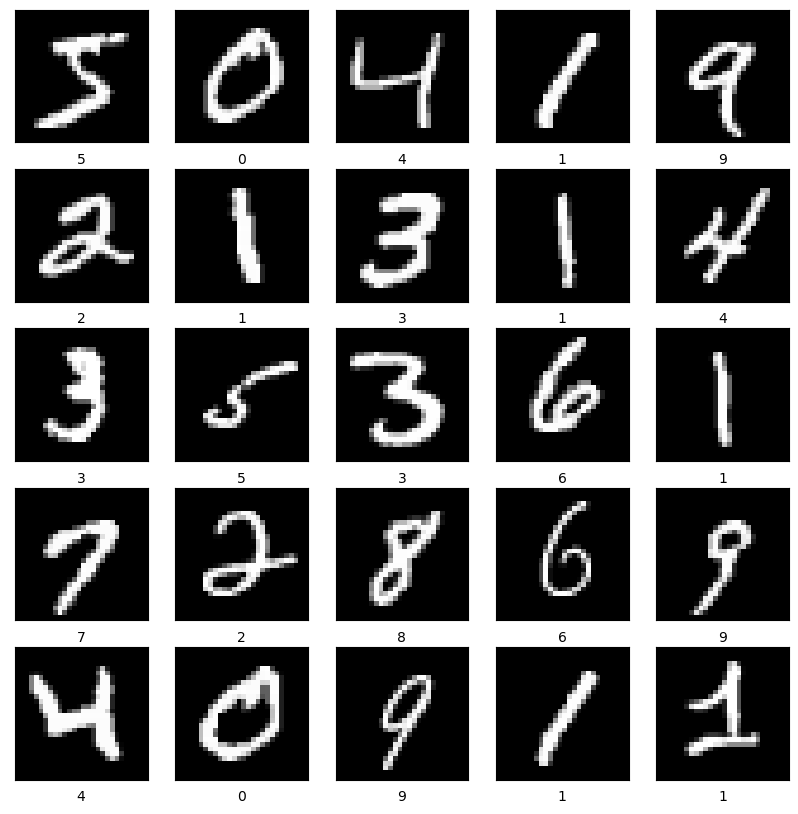

In [3]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(y_train[i]))

- C-P-C-P-C-P-F-D
- filters: 32-64-64
- kernel_size: 3*3
- padding: same
- optimizer: Adam(0.01)
- dropout: 0.25

In [16]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [5]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(32,32,3), kernel_size=(3,3),
               filters=32, activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(10, activation='softmax'))

cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

cnn.summary()

# result= cnn.fit(x_train, y_train, batch_size=128, epochs=40, validation_data=(x_test, y_test))

In [69]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

model = Sequential()

model.add(Conv2D(32, activation='relu', padding='same', input_shape=(28,28,1),kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, activation='relu', padding='same', input_shape=(28,28,1),kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, activation='relu', padding='same', input_shape=(28,28,1),kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

# result = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_test, y_test))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_43 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_44 (Dropout)        (None, 7, 7, 64)        

## (1) 학습 전 feature map 시각화

In [37]:
model.layers

In [38]:
for layer in model.layers:
    if 'conv' in layer.name:
        print(layer.name, layer.output.shape)

conv2d_24 (None, 28, 28, 32)
conv2d_25 (None, 14, 14, 64)
conv2d_26 (None, 7, 7, 64)


In [39]:
partial_model= Model(inputs=model.inputs, outputs= model.layers[0].output)
partial_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [40]:
rnd_idx= np.random.randint(0, len(X_test))
print(rnd_idx)

9577


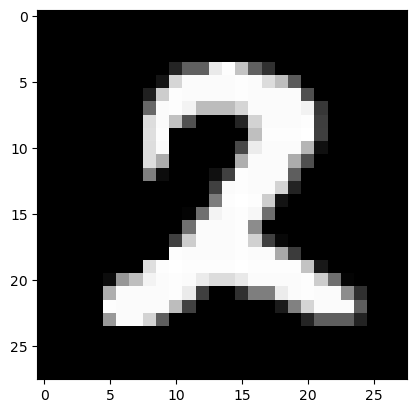

In [42]:
plt.imshow(X_test[rnd_idx], cmap='gray')

In [43]:
feature_map= partial_model.predict(X_test[rnd_idx].reshape(-1,28,28,1))
feature_map.shape

1/1 [==============================] - 0s 69ms/step


(1, 28, 28, 32)

In [50]:
fm= feature_map[0]

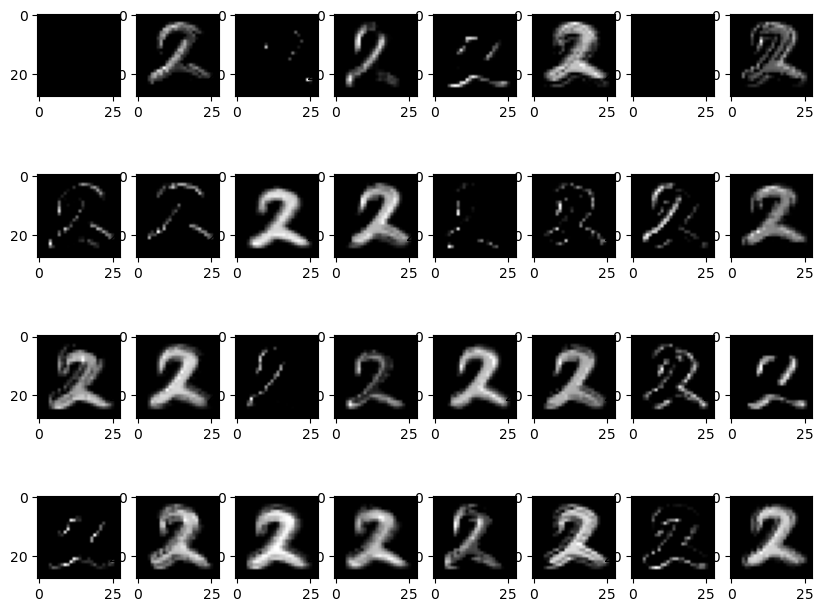

In [51]:
plt.figure(figsize=(10,8))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(fm[:,:,i], cmap='gray')

## (2)학습 전 pooling map 시각화

In [52]:
partial_model= Model(inputs=model.inputs, outputs= model.layers[1].output)
partial_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [53]:
pooling_map= partial_model.predict(X_test[rnd_idx].reshape(-1,28,28,1))
pooling_map.shape

1/1 [==============================] - 0s 33ms/step


(1, 14, 14, 32)

In [54]:
pm= pooling_map[0]

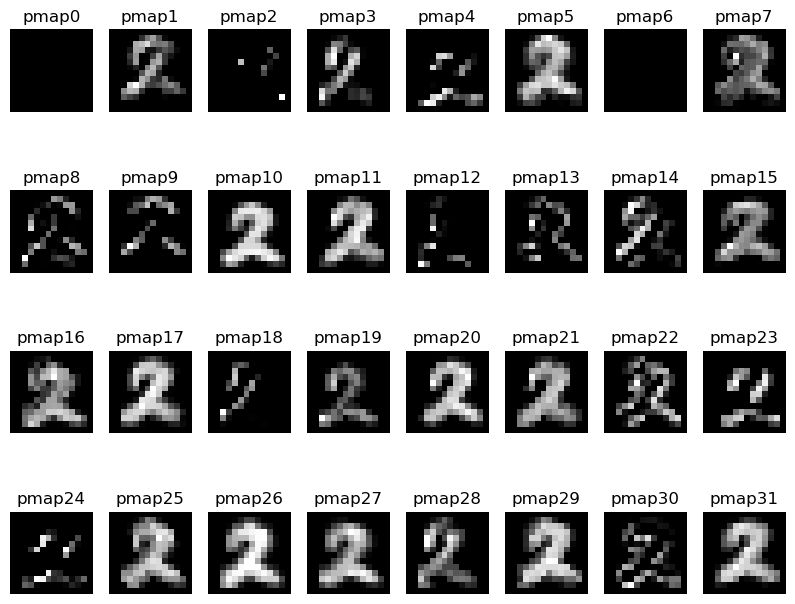

In [57]:
plt.figure(figsize=(10,8))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(pm[:,:,i], cmap='gray')
    plt.axis('off')
    plt.title('pmap'+str(i))

## (3) 학습 및 평가

In [70]:
start_time= datetime.now()
result= model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=1000)

end_time= datetime.now()
print('\n 걸린시간: ', end_time- start_time)

Epoch 1/10
48/48 [==============================] - 17s 343ms/step - loss: 5.4470 - accuracy: 0.2598 - val_loss: 1.4908 - val_accuracy: 0.5792
Epoch 2/10
48/48 [==============================] - 17s 355ms/step - loss: 1.3175 - accuracy: 0.5494 - val_loss: 0.5461 - val_accuracy: 0.8565
Epoch 3/10
48/48 [==============================] - 17s 355ms/step - loss: 0.7608 - accuracy: 0.7462 - val_loss: 0.2316 - val_accuracy: 0.9388
Epoch 4/10
48/48 [==============================] - 17s 350ms/step - loss: 0.4854 - accuracy: 0.8462 - val_loss: 0.1464 - val_accuracy: 0.9594
Epoch 5/10
48/48 [==============================] - 17s 354ms/step - loss: 0.3660 - accuracy: 0.8863 - val_loss: 0.1106 - val_accuracy: 0.9693
Epoch 6/10
48/48 [==============================] - 17s 349ms/step - loss: 0.3029 - accuracy: 0.9074 - val_loss: 0.0938 - val_accuracy: 0.9745
Epoch 7/10
48/48 [==============================] - 17s 352ms/step - loss: 0.2557 - accuracy: 0.9212 - val_loss: 0.0807 - val_accuracy: 0.9783

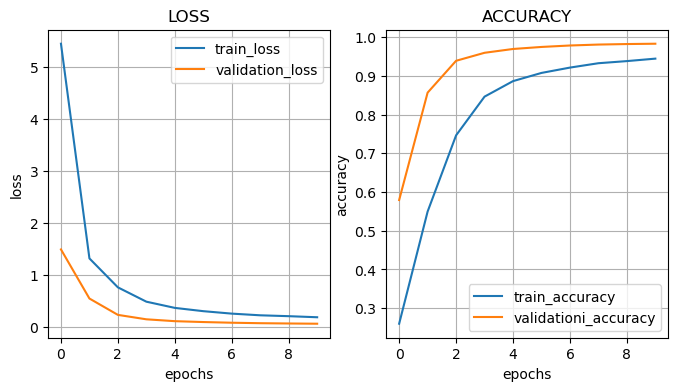

In [71]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

plt.title('LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(result.history['loss'], label='train_loss')
plt.plot(result.history['val_loss'], label= 'validation_loss')
plt.legend(loc='best')

plt.subplot(1,2,2)

plt.title('ACCURACY')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(result.history['accuracy'], label='train_accuracy')
plt.plot(result.history['val_accuracy'], label= 'validationi_accuracy')
plt.legend(loc='best')

## (4) 학습 후

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 33ms/step


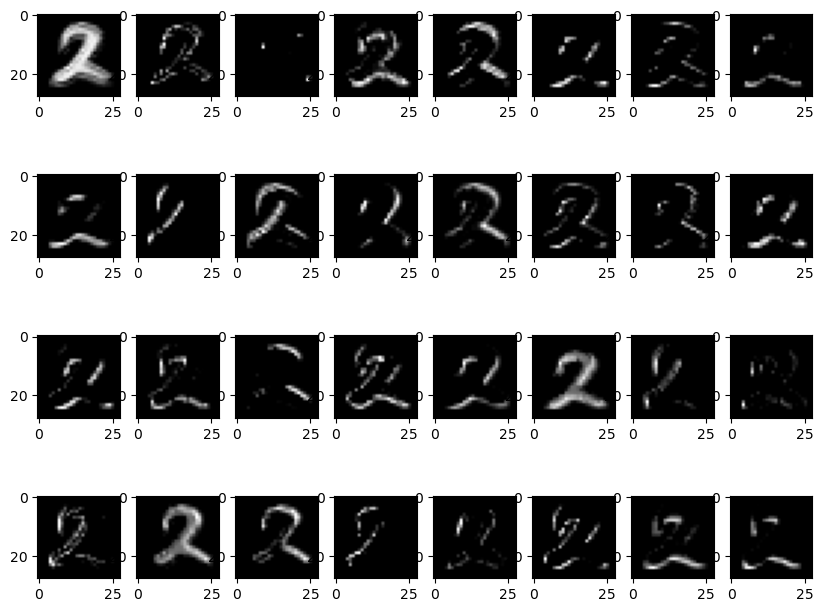

In [72]:
partial_model= Model(inputs=model.inputs, outputs= model.layers[0].output)
partial_model.summary()

feature_map= partial_model.predict(X_test[rnd_idx].reshape(-1,28,28,1))
feature_map.shape

fm= feature_map[0]

plt.figure(figsize=(10,8))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(fm[:,:,i], cmap='gray')

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 32ms/step


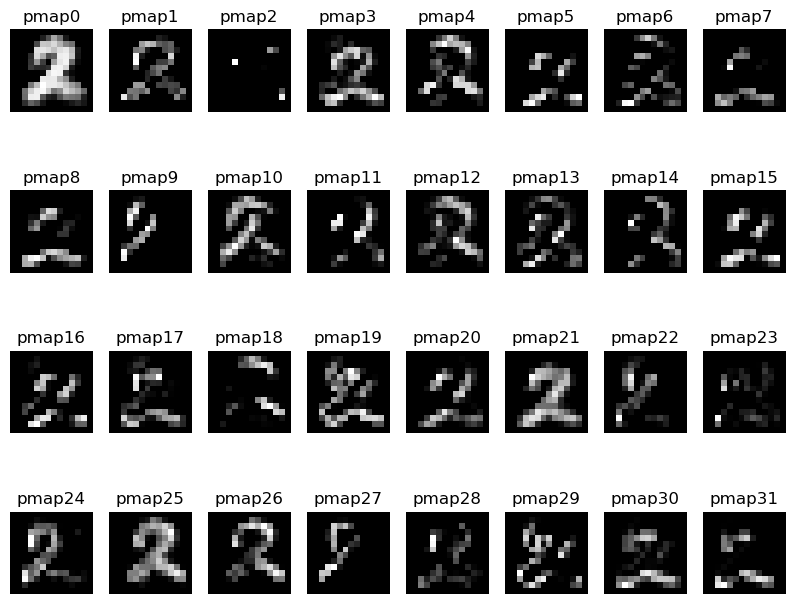

In [73]:
partial_model= Model(inputs=model.inputs, outputs= model.layers[1].output)
partial_model.summary()

pooling_map= partial_model.predict(X_test[rnd_idx].reshape(-1,28,28,1))
pooling_map.shape

pm= pooling_map[0]

plt.figure(figsize=(10,8))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(pm[:,:,i], cmap='gray')
    plt.axis('off')
    plt.title('pmap'+str(i))

## (5) 위의 모델을 Model()을 사용하여 변경

In [ ]:
# ?????

from tensorflow.keras.datasets import mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

X_train= X_train/255
X_test= X_test/255

### Model() 사용. Functional 방식
# 레이어부터 생성. 박스는 나중에

input_= Input(shape=(28,28, )) # 입력층. 생략 불가
output_= Dense(1, activation='linear')(input_) # 출력층, 함수처럼 층끼리 연결 Functional

model= Model(inputs=input_, outputs=output_)

model.compile(loss='mse', optimizer=SGD(learning_rate=0.01)) # 오차계산(mse), 오차 줄이기:SGD방식 으로 해결
model.summary()


model = Sequential()

model.add(Conv2D(32, activation='relu', padding='same', input_shape=(28,28,1),kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, activation='relu', padding='same', input_shape=(28,28,1),kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, activation='relu', padding='same', input_shape=(28,28,1),kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

input_= Input(shape=(28,28))
x1= Dense(64, activation='relu')(input_)
x2= Dense(64, activation='relu')(x1)
x3= Dense(64, activation='relu')(x2)






output_= Dense(10, activation='softmax')(x3) # 원핫인코딩하기 전이여도 10

model=Model(inputs=input_, outputs=output_)
model.compile(loss='binary_crossentropy', optimizer= Adam(learning_rate= 0.01),
              metrics=['binary_accuracy']) # 정확도 측정

model.summary()

In [74]:
# ^^ㅎㅎ
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255
X_test = X_test / 255

# Define input shape
input_shape = (28, 28, 1)

# Define input layer
inputs = Input(shape=input_shape)

# 1st Convolution Layer
x = Conv2D(filters=32, kernel_size=3, padding='SAME', activation='relu')(inputs)
x = MaxPool2D(padding='SAME')(x)
x = Dropout(0.25)(x)

# 2nd Convolution Layer
x = Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu')(x)
x = MaxPool2D(padding='SAME')(x)
x = Dropout(0.25)(x)

# 3rd Convolution Layer
x = Conv2D(filters=128, kernel_size=3, padding='SAME', activation='relu')(x)
x = MaxPool2D(padding='SAME')(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

x = Dense(32, activation='relu')(x)
x = Dense(32, activation='relu')(x)

# Output layer
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])


# Print model summary
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_47 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                      

In [75]:
start_time= datetime.now()
result= model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=1000)

end_time= datetime.now()
print('\n 걸린시간: ', end_time- start_time)

Epoch 1/10
48/48 [==============================] - 18s 365ms/step - loss: 1.0981 - accuracy: 0.6171 - val_loss: 0.1771 - val_accuracy: 0.9484
Epoch 2/10
48/48 [==============================] - 18s 367ms/step - loss: 0.1842 - accuracy: 0.9411 - val_loss: 0.0772 - val_accuracy: 0.9755
Epoch 3/10
48/48 [==============================] - 18s 376ms/step - loss: 0.1158 - accuracy: 0.9631 - val_loss: 0.0587 - val_accuracy: 0.9817
Epoch 4/10
48/48 [==============================] - 18s 384ms/step - loss: 0.0926 - accuracy: 0.9710 - val_loss: 0.0461 - val_accuracy: 0.9864
Epoch 5/10
48/48 [==============================] - 18s 384ms/step - loss: 0.0767 - accuracy: 0.9748 - val_loss: 0.0541 - val_accuracy: 0.9827
Epoch 6/10
48/48 [==============================] - 18s 385ms/step - loss: 0.0766 - accuracy: 0.9759 - val_loss: 0.0424 - val_accuracy: 0.9887
Epoch 7/10
48/48 [==============================] - 19s 392ms/step - loss: 0.0626 - accuracy: 0.9797 - val_loss: 0.0340 - val_accuracy: 0.9899

# 2. CIFAR10 모델 테스트

In [2]:
try:
    cnn= load_model('data/cifar10_accuracy_81v1.h5')
    cnn.summary()
except Exception as err:
    print(str(err))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [80]:
import cv2

In [5]:
src_img1= cv2.imread('data/test_image/cat.jpg', cv2.IMREAD_COLOR)
src_img2= cv2.imread('data/test_image/cat_2.jpg', cv2.IMREAD_COLOR)
src_img3= cv2.imread('data/test_image/automobile.jpg', cv2.IMREAD_COLOR)
src_img4= cv2.imread('data/test_image/bird.jpg', cv2.IMREAD_COLOR)
src_img5= cv2.imread('data/test_image/dog.jpg', cv2.IMREAD_COLOR)
src_img6= cv2.imread('data/test_image/dog_2.jpg', cv2.IMREAD_COLOR)

In [6]:
print(type(src_img1), src_img1.shape)
print(type(src_img2), src_img2.shape)
print(type(src_img3), src_img3.shape)
print(type(src_img4), src_img4.shape)
print(type(src_img5), src_img5.shape)
print(type(src_img6), src_img6.shape)

<class 'numpy.ndarray'> (182, 277, 3)


AttributeError: 'NoneType' object has no attribute 'shape'

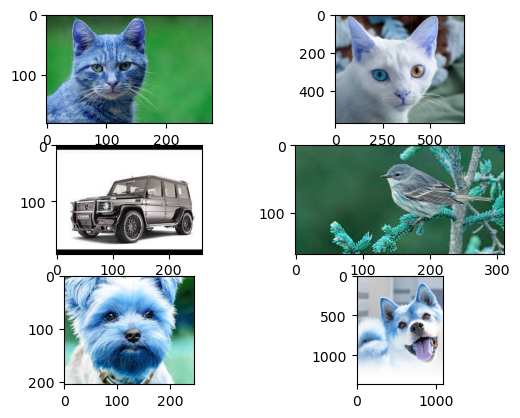

In [96]:
plt.subplot(3,2,1)
plt.imshow(src_img1)

plt.subplot(3,2,2)
plt.imshow(src_img2)

plt.subplot(3,2,3)
plt.imshow(src_img3)

plt.subplot(3,2,4)
plt.imshow(src_img4)

plt.subplot(3,2,5)
plt.imshow(src_img5)

plt.subplot(3,2,6)
plt.imshow(src_img6)

In [119]:
dst_img1= cv2.cvtColor(src_img1, cv2.COLOR_BGR2RGB)
dst_img2= cv2.cvtColor(src_img2, cv2.COLOR_BGR2RGB)
dst_img3= cv2.cvtColor(src_img3, cv2.COLOR_BGR2RGB)
dst_img4= cv2.cvtColor(src_img4, cv2.COLOR_BGR2RGB)
dst_img5= cv2.cvtColor(src_img5, cv2.COLOR_BGR2RGB)
dst_img6= cv2.cvtColor(src_img6, cv2.COLOR_BGR2RGB)

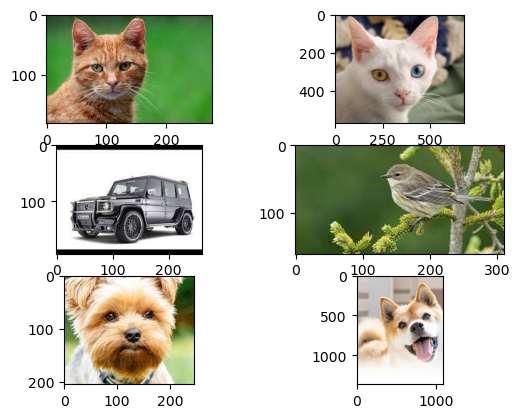

In [98]:
plt.subplot(3,2,1)
plt.imshow(dst_img1)

plt.subplot(3,2,2)
plt.imshow(dst_img2)

plt.subplot(3,2,3)
plt.imshow(dst_img3)

plt.subplot(3,2,4)
plt.imshow(dst_img4)

plt.subplot(3,2,5)
plt.imshow(dst_img5)

plt.subplot(3,2,6)
plt.imshow(dst_img6)

In [120]:
dst_img1= cv2.resize(dst_img1, dsize=(32,32))
dst_img2= cv2.resize(dst_img2, dsize=(32,32))
dst_img3= cv2.resize(dst_img3, dsize=(32,32))
dst_img4= cv2.resize(dst_img4, dsize=(32,32))
dst_img5= cv2.resize(dst_img5, dsize=(32,32))
dst_img6= cv2.resize(dst_img6, dsize=(32,32))

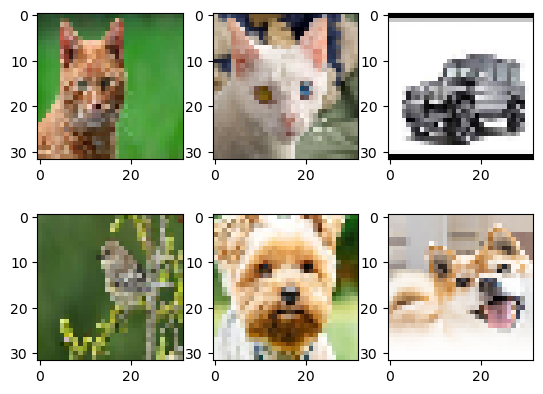

In [112]:
dst_img=[dst_img1,dst_img2,dst_img3,dst_img4,dst_img5,dst_img6]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(dst_img[i])
#     plt.axis('off')
#     plt.tight_layout()

In [113]:
print(dst_img1.shape)

(32, 32, 3)


In [121]:
dst_img1= dst_img1/255.0
dst_img2= dst_img2/255.0
dst_img3= dst_img3/255.0
dst_img4= dst_img4/255.0
dst_img5= dst_img5/255.0
dst_img6= dst_img6/255.0

In [122]:
dst_img1

array([[[0.14509804, 0.26666667, 0.14509804],
        [0.16862745, 0.29019608, 0.16862745],
        [0.16470588, 0.30980392, 0.18039216],
        ...,
        [0.23921569, 0.38431373, 0.23137255],
        [0.20784314, 0.36078431, 0.18431373],
        [0.18039216, 0.37254902, 0.16862745]],

       [[0.14901961, 0.29019608, 0.14901961],
        [0.16078431, 0.30196078, 0.16078431],
        [0.16862745, 0.31764706, 0.17254902],
        ...,
        [0.25882353, 0.43921569, 0.24705882],
        [0.23137255, 0.41960784, 0.21568627],
        [0.22745098, 0.43921569, 0.21176471]],

       [[0.15686275, 0.31764706, 0.15294118],
        [0.17647059, 0.3372549 , 0.17254902],
        [0.18823529, 0.3372549 , 0.17647059],
        ...,
        [0.25490196, 0.4745098 , 0.24313725],
        [0.24313725, 0.46666667, 0.23529412],
        [0.24313725, 0.4745098 , 0.22745098]],

       ...,

       [[0.63137255, 0.43529412, 0.28627451],
        [0.59215686, 0.38039216, 0.22352941],
        [0.62352941, 0

In [125]:
test_image_list=[]

test_image_list.append(dst_img1)
test_image_list.append(dst_img2)
test_image_list.append(dst_img3)
test_image_list.append(dst_img4)
test_image_list.append(dst_img5)
test_image_list.append(dst_img6)

test_image_array= np.array(test_image_list)
print(test_image_array.shape)

(6, 32, 32, 3)


In [126]:
pred= cnn.predict(test_image_array)

1/1 [==============================] - 0s 86ms/step


In [131]:
# print(pred.shape)
# print(pred)

class_name = ["airplne", "automobile", "bird", "cat", "deer", "dog",
             "frog", "horse", "ship", "truck"]

for i in range(len(pred)):
    class_idx= np.argmax(pred[i])
    print(class_name[class_idx], pred[i].max())

cat 0.3781403
cat 0.62885654
truck 0.7069115
bird 0.6408563
dog 0.97880906
truck 0.7906737


In [134]:
#### 상위 3개 예측값

top3=3

for i in range(len(pred)):
    sorted_index= pred[i].argsort()
    sorted_index= sorted_index[::-1]
    print('==============')
    print(sorted_index)
    
    for j in range(top3):
        pred_val= pred[i, sorted_index[j]]
        class_idx= sorted_index[j]
        print('예측값:', class_name[class_idx], pred_val)

[3 4 5 7 2 6 0 9 8 1]
예측값: cat 0.3781403
예측값: deer 0.23598605
예측값: dog 0.22394186
[3 5 4 7 6 2 0 9 8 1]
예측값: cat 0.62885654
예측값: dog 0.20045647
예측값: deer 0.0915264
[9 1 0 8 3 7 6 5 2 4]
예측값: truck 0.7069115
예측값: automobile 0.292598
예측값: airplne 0.00032192332
[2 6 4 3 5 7 0 9 8 1]
예측값: bird 0.6408563
예측값: frog 0.18587635
예측값: deer 0.080338284
[5 3 2 6 7 4 0 1 8 9]
예측값: dog 0.97880906
예측값: cat 0.012024352
예측값: bird 0.008816172
[9 1 3 0 5 7 8 6 2 4]
예측값: truck 0.7906737
예측값: automobile 0.120068796
예측값: cat 0.032930948


## (1) 이미지 예측에 정답 출력하기
- 파일명을 레이블에 맞게 수정하기
    - 번호를 붙일 경우 _와 같이 분리할 수 있는 기준을 둔다

In [8]:
try:
    cnn= load_model('data/cifar10_accuracy_81v1.h5')
    cnn.summary()
except Exception as err:
    print(str(err))

# 파일명 불러오기
import glob
import cv2

test_img_list=glob.glob('data/test_image/*')

# 정답 추출
label_list=[]
for i in range(len(test_img_list)):
    label_list.append(test_img_list[i].split("\\")[1].split(".")[0].split('_')[0].strip())

label_list
# 이미지 불러오기
src_img1= cv2.imread('data/test_image/cat.jpg', cv2.IMREAD_COLOR)
src_img2= cv2.imread('data/test_image/cat_2.jpg', cv2.IMREAD_COLOR)
src_img3= cv2.imread('data/test_image/automobile.jpg', cv2.IMREAD_COLOR)
src_img4= cv2.imread('data/test_image/bird.jpg', cv2.IMREAD_COLOR)
src_img5= cv2.imread('data/test_image/dog.jpg', cv2.IMREAD_COLOR)
src_img6= cv2.imread('data/test_image/dog_2.jpg', cv2.IMREAD_COLOR)


# 색 조정
dst_img1= cv2.cvtColor(src_img1, cv2.COLOR_BGR2RGB)
dst_img2= cv2.cvtColor(src_img2, cv2.COLOR_BGR2RGB)
dst_img3= cv2.cvtColor(src_img3, cv2.COLOR_BGR2RGB)
dst_img4= cv2.cvtColor(src_img4, cv2.COLOR_BGR2RGB)
dst_img5= cv2.cvtColor(src_img5, cv2.COLOR_BGR2RGB)
dst_img6= cv2.cvtColor(src_img6, cv2.COLOR_BGR2RGB)


# 사이즈 조정
dst_img1= cv2.resize(dst_img1, dsize=(32,32))
dst_img2= cv2.resize(dst_img2, dsize=(32,32))
dst_img3= cv2.resize(dst_img3, dsize=(32,32))
dst_img4= cv2.resize(dst_img4, dsize=(32,32))
dst_img5= cv2.resize(dst_img5, dsize=(32,32))
dst_img6= cv2.resize(dst_img6, dsize=(32,32))

# dst_img=[dst_img1,dst_img2,dst_img3,dst_img4,dst_img5,dst_img6]

# for i in range(6):
#     plt.subplot(2,3,i+1)
#     plt.imshow(dst_img[i])
# #     plt.axis('off')
# #     plt.tight_layout()

# 정규화
dst_img1= dst_img1/255.0
dst_img2= dst_img2/255.0
dst_img3= dst_img3/255.0
dst_img4= dst_img4/255.0
dst_img5= dst_img5/255.0
dst_img6= dst_img6/255.0


# 차원 맞추기
test_image_list=[]
test_image_list.append(dst_img1)
test_image_list.append(dst_img2)
test_image_list.append(dst_img3)
test_image_list.append(dst_img4)
test_image_list.append(dst_img5)
test_image_list.append(dst_img6)

test_image_array= np.array(test_image_list)
print(test_image_array.shape)


# 예측
pred= cnn.predict(test_image_array)


# 예측 확인
class_name = ["airplne", "automobile", "bird", "cat", "deer", "dog",
             "frog", "horse", "ship", "truck"]

for i in range(len(pred)):
    class_idx= np.argmax(pred[i])
    print(class_name[class_idx], pred[i].max(), 'label:', label_list[i])

#### 상위 3개 예측값

top3=3

for i in range(len(pred)):
    sorted_index= pred[i].argsort()
    sorted_index= sorted_index[::-1]
    print('==============')
    print(sorted_index, 'label:',label_list[i])
    
    for j in range(top3):
        pred_val= pred[i, sorted_index[j]]
        class_idx= sorted_index[j]
        print('예측값:', class_name[class_idx], pred_val)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

## (2) 이미지 예측에 정답 출력하기
- 폴더명을 레이블명으로 만들기
- 먼저 탐색기에서 레이블명으로 폴더를 만들고 이미지를 이동시킨다


### colab에서 작업할 경우
- 이미지 폴더를 압축하여 업로드 한다

In [2]:
import os
import zipfile
import shutil

shutil.rmtree('/content/test_img2') # 폴더 삭제

# with zipfile.ZipFile('/content/test_image2.zip', 'r') as target_file:
#     target_file.extractall() # 압축 풀기
        
# 특정 폴더 안에 압축 풀기
with zipfile.ZipFile('/content/test_image2.zip', 'r') as target_file:
    target_file.extractall('/content/test_img2')

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: '/content/test_img2'

In [7]:
try:
    cnn= load_model('data/cifar10_accuracy_81v1.h5')
#     cnn.summary()
except Exception as err:
    print(str(err))

# 파일명 불러오기
import glob
import cv2

test_img_list=glob.glob('data/test_image2/*/*')
print(test_img_list)

# 정답 추출
label_list=[]
for i in range(len(test_img_list)):
    label_list.append(test_img_list[i].split("\\")[1].strip())

label_list
# 이미지 불러오기
src_img1= cv2.imread('data/test_image/cat.jpg', cv2.IMREAD_COLOR)
src_img2= cv2.imread('data/test_image/cat_2.jpg', cv2.IMREAD_COLOR)
src_img3= cv2.imread('data/test_image/automobile.jpg', cv2.IMREAD_COLOR)
src_img4= cv2.imread('data/test_image/bird.jpg', cv2.IMREAD_COLOR)
src_img5= cv2.imread('data/test_image/dog.jpg', cv2.IMREAD_COLOR)
src_img6= cv2.imread('data/test_image/dog_2.jpg', cv2.IMREAD_COLOR)


# 색 조정
dst_img1= cv2.cvtColor(src_img1, cv2.COLOR_BGR2RGB)
dst_img2= cv2.cvtColor(src_img2, cv2.COLOR_BGR2RGB)
dst_img3= cv2.cvtColor(src_img3, cv2.COLOR_BGR2RGB)
dst_img4= cv2.cvtColor(src_img4, cv2.COLOR_BGR2RGB)
dst_img5= cv2.cvtColor(src_img5, cv2.COLOR_BGR2RGB)
dst_img6= cv2.cvtColor(src_img6, cv2.COLOR_BGR2RGB)


# 사이즈 조정
dst_img1= cv2.resize(dst_img1, dsize=(32,32))
dst_img2= cv2.resize(dst_img2, dsize=(32,32))
dst_img3= cv2.resize(dst_img3, dsize=(32,32))
dst_img4= cv2.resize(dst_img4, dsize=(32,32))
dst_img5= cv2.resize(dst_img5, dsize=(32,32))
dst_img6= cv2.resize(dst_img6, dsize=(32,32))

# dst_img=[dst_img1,dst_img2,dst_img3,dst_img4,dst_img5,dst_img6]

# for i in range(6):
#     plt.subplot(2,3,i+1)
#     plt.imshow(dst_img[i])
# #     plt.axis('off')
# #     plt.tight_layout()

# 정규화
dst_img1= dst_img1/255.0
dst_img2= dst_img2/255.0
dst_img3= dst_img3/255.0
dst_img4= dst_img4/255.0
dst_img5= dst_img5/255.0
dst_img6= dst_img6/255.0


# 차원 맞추기
test_image_list=[]
test_image_list.append(dst_img1)
test_image_list.append(dst_img2)
test_image_list.append(dst_img3)
test_image_list.append(dst_img4)
test_image_list.append(dst_img5)
test_image_list.append(dst_img6)

test_image_array= np.array(test_image_list)
print(test_image_array.shape)


# 예측
pred= cnn.predict(test_image_array)


# 예측 확인
class_name = ["airplne", "automobile", "bird", "cat", "deer", "dog",
             "frog", "horse", "ship", "truck"]

for i in range(len(pred)):
    class_idx= np.argmax(pred[i])
    print(class_name[class_idx], pred[i].max(), 'label:', label_list[i])

#### 상위 3개 예측값

top3=3

for i in range(len(pred)):
    sorted_index= pred[i].argsort()
    sorted_index= sorted_index[::-1]
    print('==============')
    print(sorted_index, 'label:',label_list[i])
    
    for j in range(top3):
        pred_val= pred[i, sorted_index[j]]
        class_idx= sorted_index[j]
        print('예측값:', class_name[class_idx], pred_val)

['data/test_image2\\airplane\\airplane.jpg', 'data/test_image2\\bird\\bird.jpg', 'data/test_image2\\cat\\cat.jpg', 'data/test_image2\\cat\\cat_2.jpg', 'data/test_image2\\dog\\dog.jpg', 'data/test_image2\\dog\\dog_2.jpg', 'data/test_image2\\frog\\frog.jpg', 'data/test_image2\\truck\\truck.jpg']
(6, 32, 32, 3)
1/1 [==============================] - 0s 115ms/step
cat 0.45021662 label: airplane
dog 0.62709934 label: bird
ship 0.7684086 label: cat
bird 0.5165168 label: cat
dog 0.9912042 label: dog
truck 0.369684 label: dog
[3 5 7 4 2 6 0 9 8 1] label: airplane
예측값: cat 0.45021662
예측값: dog 0.25894547
예측값: horse 0.113644086
[5 3 7 4 2 6 0 9 8 1] label: bird
예측값: dog 0.62709934
예측값: cat 0.15793177
예측값: horse 0.1368309
[8 6 9 1 3 0 2 4 5 7] label: cat
예측값: ship 0.7684086
예측값: frog 0.09826348
예측값: truck 0.075230934
[2 4 6 3 0 5 7 8 9 1] label: cat
예측값: bird 0.5165168
예측값: deer 0.21528292
예측값: frog 0.20868787
[5 3 2 7 4 6 0 8 9 1] label: dog
예측값: dog 0.9912042
예측값: cat 0.0065479986
예측값: bird 0.00

# 3. 구글 포토 서비스 프로토타입 구현
- photo라는 폴더에 이미지를 수집

In [8]:
import cv2

try:
    cnn= load_model('data/cifar10_accuracy_81v1.h5')
except Exception as err:
    print(str(err))

In [10]:
import os

target_root_dir= 'data/pred_result'

if not os.path.exists(target_root_dir):
    os.mkdir(target_root_dir)
    print(target_root_dir +'is created~')

In [13]:
class_name=['airplane','automobile','bird','truck','cat','deer','dog','frog','horse','ship']

for i in range(len(class_name)):
    label_dir= target_root_dir + '/' + class_name[i].strip()
    
    if not os.path.exists(label_dir):
        os.mkdir(label_dir)
        print(label_dir +' is created~')
        
unknown_dir= target_root_dir + '/unknown/'        
if not os.path.exists(unknown_dir):
    os.mkdir(unknown_dir)
    print(unknown_dir +' is created~')

data/pred_result/unknown/ is created~


In [16]:
#### 테스트할 이미지의 압축 풀기
import zipfile

# 특정 폴더 안에 압축 풀기
with zipfile.ZipFile('data/photo.zip', 'r') as target_file:
    target_file.extractall('data/photo')
    print('success~')

success~


In [20]:
import cv2
import glob

src_img_list= []
dst_img_list= []

img_file_list= glob.glob('data/photo/*/*')
print(img_file_list)

# 이미지 불러오기, 색 조정, 사이즈 조정, 정규화
for i in img_file_list:
    src_img= cv2.imread(i, cv2.IMREAD_COLOR)
    dst_img= cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
    dst_img= cv2.resize(dst_img, dsize=(32,32))
    dst_img= dst_img/255.0
    
    print(src_img.shape, dst_img.shape)
    
    src_img_list.append(src_img)
    dst_img_list.append(dst_img)

['data/photo\\airplane\\airplane.jpg', 'data/photo\\airplane\\airplane_2.jpg', 'data/photo\\bird\\bird.jpg', 'data/photo\\bird\\bird_2.jpg', 'data/photo\\cat\\cat.jpg', 'data/photo\\cat\\cat_2.jpg', 'data/photo\\dog\\dog.jpg', 'data/photo\\dog\\dog_2.jpg', 'data/photo\\hamster\\hamster.jpg', 'data/photo\\hamster\\hamster_2.jpg', 'data/photo\\truck\\truck.jpg', 'data/photo\\truck\\truck_2.jpg']
(194, 259, 3) (32, 32, 3)
(183, 275, 3) (32, 32, 3)
(162, 311, 3) (32, 32, 3)
(183, 275, 3) (32, 32, 3)
(182, 277, 3) (32, 32, 3)
(573, 680, 3) (32, 32, 3)
(205, 246, 3) (32, 32, 3)
(1363, 1080, 3) (32, 32, 3)
(183, 275, 3) (32, 32, 3)
(224, 225, 3) (32, 32, 3)
(183, 275, 3) (32, 32, 3)
(171, 295, 3) (32, 32, 3)


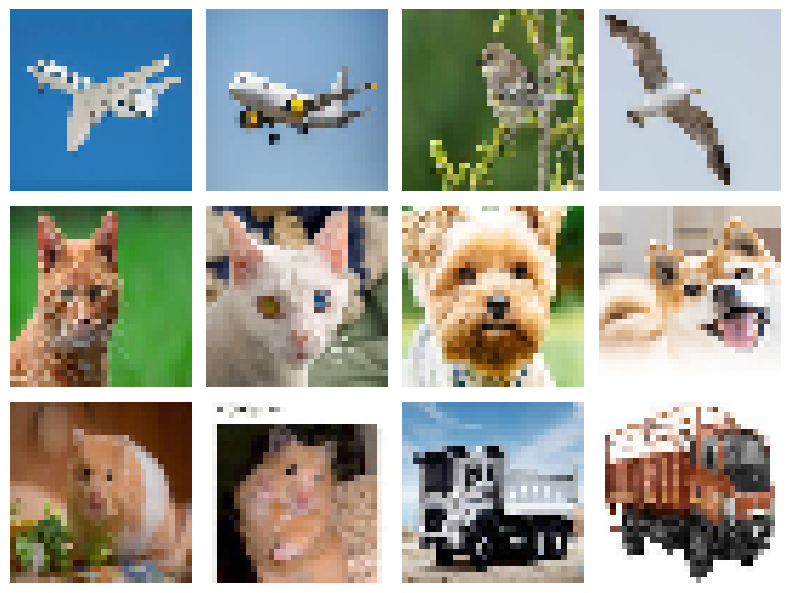

In [24]:
plt.figure(figsize=(8,8))

for i in range(len(src_img_list)):
    plt.subplot(4,4,i+1)
    plt.imshow(dst_img_list[i])
    plt.axis('off')
    
plt.tight_layout()

In [31]:
dst_img_array= np.array(dst_img_list)

#### 예측
pred= cnn.predict(dst_img_array)

#### 예측 확인
class_name = ["airplne", "automobile", "bird", "cat", "deer", "dog",
             "frog", "horse", "ship", "truck"]

label_list=[]
for i in range(len(img_file_list)):
    label_list.append(img_file_list[i].split("\\")[1].strip())
# print(label_list)

for i in range(len(pred)):
    class_idx= np.argmax(pred[i])
    print(class_name[class_idx], pred[i].max())

    
    
#### 상위 3개 예측값

top3=3

for i in range(len(pred)):
    sorted_index= pred[i].argsort()
    sorted_index= sorted_index[::-1]
    print('==============')
    print(sorted_index, 'label: ', label_list[i])
    
    for j in range(top3):
        pred_val= pred[i, sorted_index[j]]
        class_idx= sorted_index[j]
        print('예측값:', class_name[class_idx], pred_val)

1/1 [==============================] - 0s 22ms/step
airplne 0.9988813
airplne 0.99999964
bird 0.5165168
airplne 0.84775776
cat 0.45021662
dog 0.62709934
dog 0.9912042
truck 0.36968407
dog 0.6482435
cat 0.9808399
truck 0.9999987
truck 1.0
[0 2 8 4 3 9 5 7 1 6] label:  airplane
예측값: airplne 0.9988813
예측값: bird 0.001030222
예측값: ship 8.4838e-05
[0 8 2 4 9 3 7 5 1 6] label:  airplane
예측값: airplne 0.99999964
예측값: ship 3.3903945e-07
예측값: bird 1.4102332e-08
[2 4 6 3 0 5 7 8 9 1] label:  bird
예측값: bird 0.5165168
예측값: deer 0.21528287
예측값: frog 0.20868783
[0 2 4 8 3 5 7 6 9 1] label:  bird
예측값: airplne 0.84775776
예측값: bird 0.13262193
예측값: deer 0.009422099
[3 5 7 4 2 6 0 9 8 1] label:  cat
예측값: cat 0.45021662
예측값: dog 0.25894547
예측값: horse 0.1136441
[5 3 7 4 2 6 0 9 8 1] label:  cat
예측값: dog 0.62709934
예측값: cat 0.15793177
예측값: horse 0.1368309
[5 3 2 7 4 6 0 8 9 1] label:  dog
예측값: dog 0.9912042
예측값: cat 0.0065479986
예측값: bird 0.001999697
[9 3 6 5 1 0 7 2 4 8] label:  dog
예측값: truck 0.36968407
예측값:

In [32]:
import shutil

class_name = ["airplne", "automobile", "bird", "cat", "deer", "dog",
             "frog", "horse", "ship", "truck"]

for index in range(len(pred)):
    class_index= np.argmax(pred[index])
    print(class_name[class_index], pred[index].max())
    
    if(pred[index].max() >= 0.5):
        target_dir= target_root_dir + '/'+class_name[class_index].strip()
        shutil.copy(img_file_list[index], target_dir) # 파일 복사
        filename= img_file_list[index].split('\\')[1].strip()
        print(filename,' is copied into ', target_dir)
    else:
        target_dir= target_root_dir+'/unknown'
        shutil.copy(img_file_list[index], target_dir)
        print(filename,' is copied into ', target_dir)


airplne 0.9988813
airplane  is copied into  data/pred_result/airplne
airplne 0.99999964
airplane  is copied into  data/pred_result/airplne
bird 0.5165168
bird  is copied into  data/pred_result/bird
airplne 0.84775776
bird  is copied into  data/pred_result/airplne
cat 0.45021662
bird  is copied into  data/pred_result/unknown
dog 0.62709934
cat  is copied into  data/pred_result/dog
dog 0.9912042
dog  is copied into  data/pred_result/dog
truck 0.36968407
dog  is copied into  data/pred_result/unknown
dog 0.6482435
hamster  is copied into  data/pred_result/dog
cat 0.9808399
hamster  is copied into  data/pred_result/cat
truck 0.9999987
truck  is copied into  data/pred_result/truck
truck 1.0
truck  is copied into  data/pred_result/truck
